In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from matplotlib.image import imread
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten,
    BatchNormalization, GlobalAveragePooling2D
)
from keras.applications.vgg16 import VGG16
from glob import *
glob('/pycharm/*')
from tensorflow.keras.utils import plot_model

Fetching the data


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_path = '/content/drive/MyDrive/Data'
test_path = '/content/drive/MyDrive/Data/test'
train_path = '/content/drive/MyDrive/Data/train'
test_path_normal = '/content/drive/MyDrive/Data/test/NORMAL'
test_path_pneumonia = '/content/drive/MyDrive/Data/test/PNEUMONIA'
train_path_normal = '/content/drive/MyDrive/Data/train/NORMAL'
train_path_pneumonia = '/content/drive/MyDrive/Data/train/PNEUMONIA'
os.listdir(test_path)
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

Accessing data from google drive and Pre - processing

In [ ]:
from google.colab import drive

Exploratory Data Analysis

In [ ]:
from tensorflow.python import train
# Determining the no of images in each category

print(f"Training Set has: {len(train_path)} images")
print(f"Testing Set has: {len(test_path)} images")
print(f"Normal Images in training set are : {len(train_path_normal)} images")
print(f"Pneumonia Images in training set are : {len(train_path_pneumonia)} images")
print(f"Normal Images in testing set are : {len(test_path_normal)} images")
print(f"Testing Images in training set are : {len(test_path_pneumonia)} images")

Training Set has: 33 images
Testing Set has: 32 images
Normal Images in training set are : 40 images
Pneumonia Images in training set are : 43 images
Normal Images in testing set are : 39 images
Testing Images in training set are : 42 images


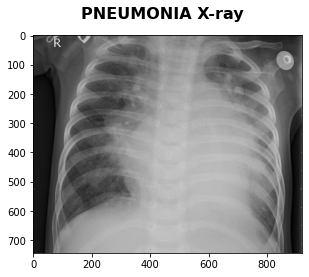

In [ ]:
# Observation of an image sample for each category of X-ray

pneumonia_sample = imread(train_path+"/PNEUMONIA"+"/PNEUMONIA(3140).jpg")
plt.imshow(pneumonia_sample)
plt.suptitle('PNEUMONIA X-ray', fontsize=16, weight='bold');

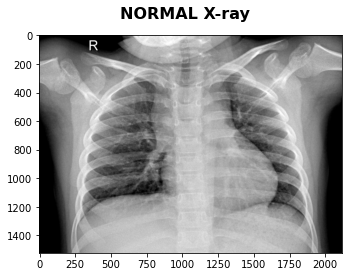

In [ ]:
normal_sample = imread(train_path+"/NORMAL"+"/NORMAL(285).jpg")
plt.imshow(normal_sample)
plt.suptitle('NORMAL X-ray', fontsize=16, weight='bold');

In [ ]:
# Distribution Plot

plot={"train":[train_path_normal,train_path_pneumonia],"test":[test_path_normal,test_path_pneumonia]}

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])
# create empty figure trace
figure_traces = []
# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
i=1
for p in plot:
    fig.add_trace(go.Pie(labels=["Normal","Pneumonia"],
            values=[len(plot[p][0]),len(plot[p][1])],
            marker={'colors':['palevioletred','blue']},
            hole=0.2),
            row=1,col=i)
    i+=1
    fig.update_layout(template="plotly_dark",title="Normal vs Pneumonia")
fig.show()

DATA AUGMENTATION

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 4686 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [ ]:
Labels={'NORMAL':0,'PNEUMONIA':1}

# convert label to code
def getCode(label):
    return Labels[label]


# convert code to label
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
          return x

In [ ]:
# test the labels

print(getCode('PNEUMONIA'))
print(getLabel(1))

1
PNEUMONIA


BUILD THE NETWORK



In [ ]:
# CNN

In [ ]:
image_size = (224,224,2)

model = Sequential()
model.add(Conv2D(64,(2,2),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D( 128, (2,2), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(2,2), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(2,2), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(2, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 128)     32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 55, 55, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 256)       1

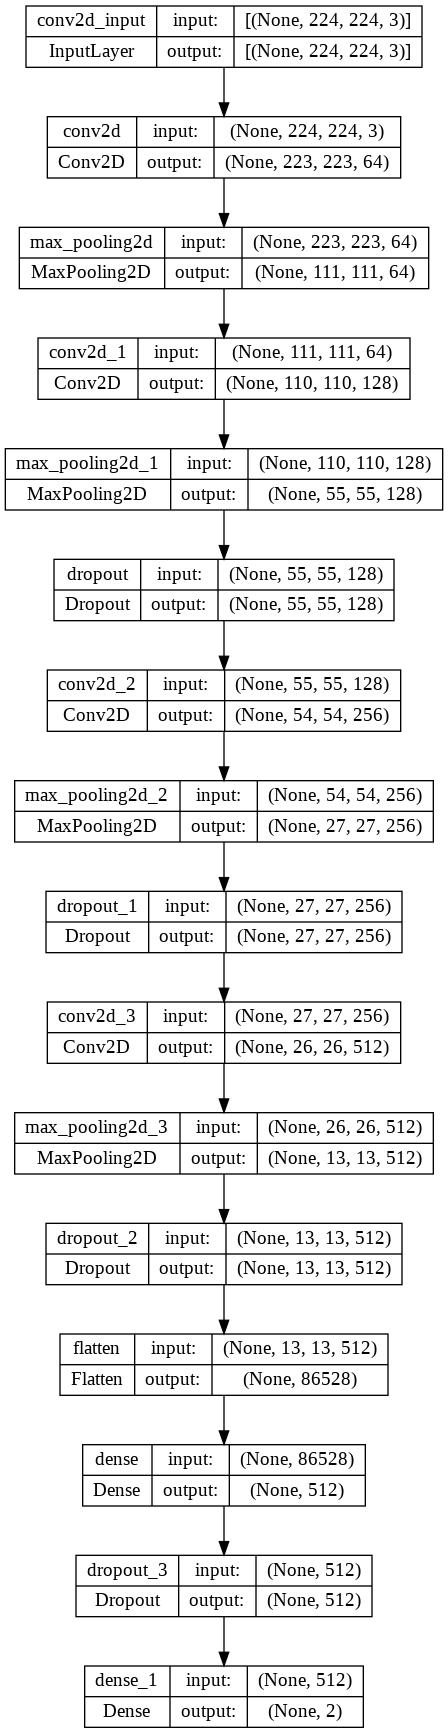

In [ ]:
# plot model layer

keras.utils.plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(training_set, validation_data=test_set,steps_per_epoch=10,epochs=10)

Epoch 1/10
10/10 [==============================] - 1035s 112s/step - loss: 1.5530 - accuracy: 0.6187 - val_loss: 0.6151 - val_accuracy: 0.7295
Epoch 2/10
10/10 [==============================] - 116s 12s/step - loss: 0.6884 - accuracy: 0.7063 - val_loss: 0.6336 - val_accuracy: 0.7295
Epoch 3/10
10/10 [==============================] - 116s 12s/step - loss: 0.6459 - accuracy: 0.6812 - val_loss: 0.6335 - val_accuracy: 0.7295
Epoch 4/10
10/10 [==============================] - 112s 11s/step - loss: 0.6245 - accuracy: 0.7000 - val_loss: 0.6040 - val_accuracy: 0.7295
Epoch 5/10
10/10 [==============================] - 115s 12s/step - loss: 0.5490 - accuracy: 0.7688 - val_loss: 0.5912 - val_accuracy: 0.7295
Epoch 6/10
10/10 [==============================] - 99s 10s/step - loss: 0.6426 - accuracy: 0.6875 - val_loss: 0.6306 - val_accuracy: 0.7295
Epoch 7/10
10/10 [==============================] - 103s 10s/step - loss: 0.6111 - accuracy: 0.7215 - val_loss: 0.5975 - val_accuracy: 0.7295
Epoch

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.668749988079071
validation_accuracy 0.7534129619598389


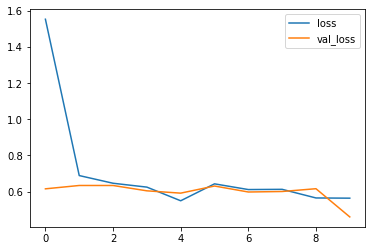

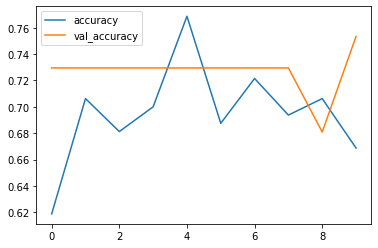

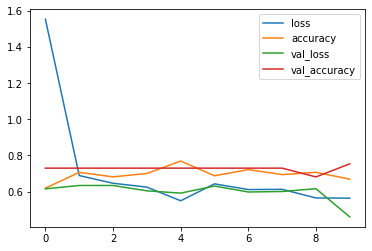

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()
losses.plot()

74/74 [==============================] - 25s 339ms/step


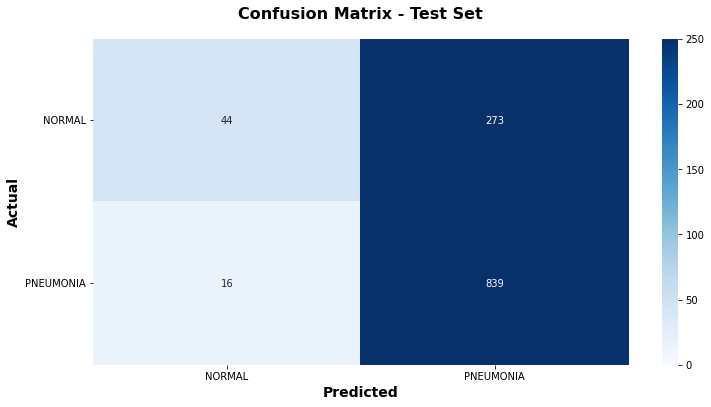

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


classes = [ "NORMAL", "PNEUMONIA"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.73      0.14      0.23       317
           1       0.75      0.98      0.85       855

    accuracy                           0.75      1172
   macro avg       0.74      0.56      0.54      1172
weighted avg       0.75      0.75      0.69      1172



In [ ]:
# Define few parameters

In [ ]:
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 50
batch_size = 32

#define paths
data_path = '/content/drive/MyDrive/Data'
test_path = '/content/drive/MyDrive/Data/test'
train_path = '/content/drive/MyDrive/Data/train'
test_path_normal = '/content/drive/MyDrive/Data/test/NORMAL'
test_path_pneumonia = '/content/drive/MyDrive/Data/test/PNEUMONIA'
train_path_normal = '/content/drive/MyDrive/Data/train/NORMAL'
train_path_pneumonia = '/content/drive/MyDrive/Data/train/PNEUMONIA'

# Use glob to grab images from path .jpg or jpeg

train_pneumonia = glob(train_path_pneumonia + '/*')
train_normal = glob(train_path_normal + '/*')
test_pneumonia = glob(test_path_pneumonia + '/*')
test_normal = glob(test_path_normal + '/*')

ResNet


94765736/94765736 [==============================] - 5s 0us/step


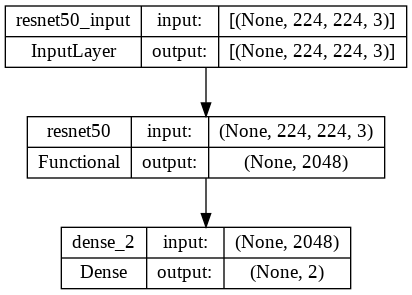

In [ ]:
from tensorflow.keras.applications import ResNet50

model1=Sequential()

# adding the pre trained ResNet 50 model
model1.add(ResNet50(include_top=False,weights='imagenet',pooling='max',input_shape=(224,224,3)))

# adding the output layer
model1.add(Dense(2,activation='softmax'))

# compilig the model
model1.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=.01),metrics=['accuracy'])

# printing the blueprint of the model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model1.fit(training_set, validation_data=test_set,steps_per_epoch=10,epochs=25)

Epoch 1/25
10/10 [==============================] - 83s 8s/step - loss: 38.1266 - accuracy: 0.7000 - val_loss: 65793984.0000 - val_accuracy: 0.7295
Epoch 2/25
10/10 [==============================] - 36s 4s/step - loss: 0.4553 - accuracy: 0.8125 - val_loss: 1652545.5000 - val_accuracy: 0.7295
Epoch 3/25
10/10 [==============================] - 33s 4s/step - loss: 0.3461 - accuracy: 0.8500 - val_loss: 190927.2188 - val_accuracy: 0.7295
Epoch 4/25
10/10 [==============================] - 32s 3s/step - loss: 0.3970 - accuracy: 0.8313 - val_loss: 33682.3984 - val_accuracy: 0.7295
Epoch 5/25
10/10 [==============================] - 34s 4s/step - loss: 12.3419 - accuracy: 0.8000 - val_loss: 2247051.2500 - val_accuracy: 0.7295
Epoch 6/25
10/10 [==============================] - 32s 4s/step - loss: 14.2102 - accuracy: 0.7250 - val_loss: 165932336.0000 - val_accuracy: 0.7295
Epoch 7/25
10/10 [==============================] - 47s 5s/step - loss: 7.1221 - accuracy: 0.6687 - val_loss: 57893.8281 

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.875
validation_accuracy 0.729522168636322


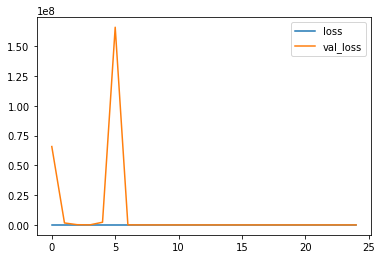

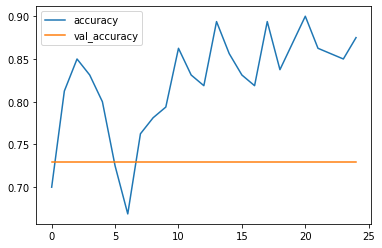

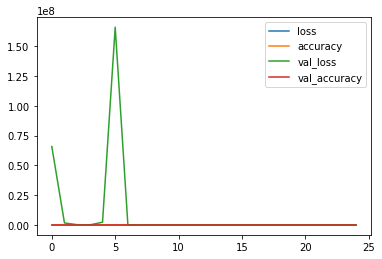

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()
losses.plot()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.875
validation_accuracy 0.729522168636322


VGG 19

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



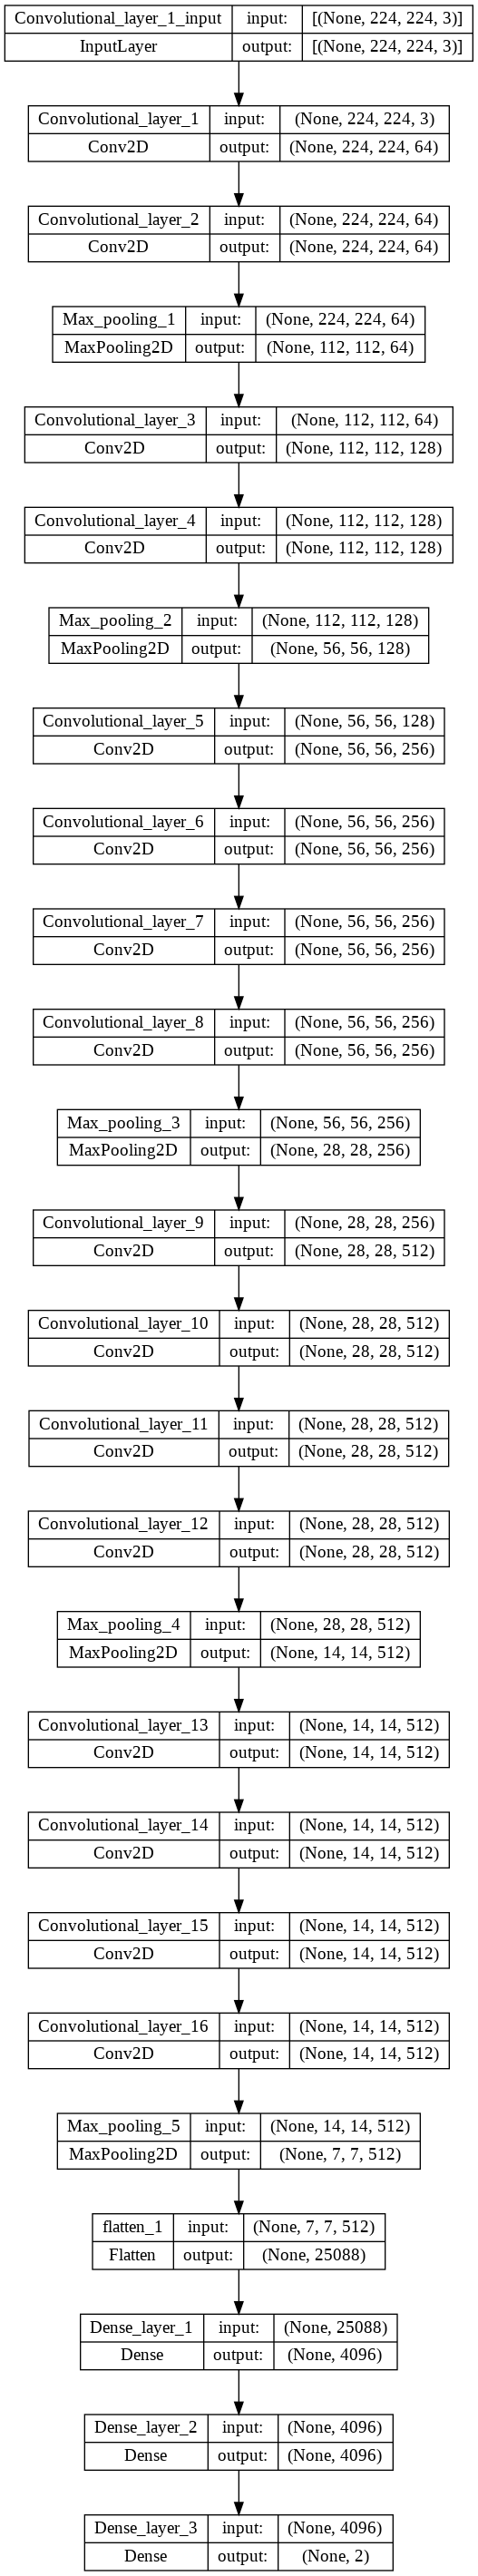

In [ ]:
model2=Sequential()

# Layer 1: Convolutional
model2.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_1',input_shape=(224,224,3)))

# Layer 2: Convolutional
model2.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_2'))

# MaxPool 1
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_1'))

# Layer 3: Convolutional
model2.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_3'))

# Layer 4: Convolutional
model2.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_4'))

# MaxPool 2
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_2'))

# Layer 5: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_5'))

# Layer 6: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_6'))

# Layer 7: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_7'))

# Layer 8: Convolutional
model2.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_8'))

# MaxPool 3
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_3'))

# Layer 9: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_9'))

# Layer 10: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_10'))

# Layer 11: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_11'))

# Layer 12: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_12'))

# MaxPool 4
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_4'))

# Layer 13: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_13'))

# Layer 14: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_14'))

# Layer 15: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_15'))

# Layer 16: Convolutional
model2.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',name='Convolutional_layer_16'))

# MaxPool 5
model2.add(MaxPool2D(pool_size=2,strides=2,name='Max_pooling_5'))

# flatten
model2.add(Flatten(input_shape=[227,227,3]))
/
# Layer 17: Fully Connected
model2.add(Dense(units=4096,activation='relu',name='Dense_layer_1'))

# Layer 18: Fully Connected
model2.add(Dense(units=4096,activation='relu',name='Dense_layer_2'))

# Layer 19: Fully Connected
model2.add(Dense(units=2,activation='softmax',name='Dense_layer_3'))

# compiling the model
model2.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=.01),metrics=['accuracy'])

# printing the blueprint of the model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model2.fit(training_set, validation_data=test_set,steps_per_epoch=10,epochs=40)

Epoch 1/40
10/10 [==============================] - 38s 4s/step - loss: 0.6825 - accuracy: 0.7188 - val_loss: 0.6688 - val_accuracy: 0.7295
Epoch 2/40
10/10 [==============================] - 32s 3s/step - loss: 0.6561 - accuracy: 0.7437 - val_loss: 0.6463 - val_accuracy: 0.7295
Epoch 3/40
10/10 [==============================] - 34s 4s/step - loss: 0.6345 - accuracy: 0.7437 - val_loss: 0.6281 - val_accuracy: 0.7295
Epoch 4/40
10/10 [==============================] - 31s 3s/step - loss: 0.6043 - accuracy: 0.7688 - val_loss: 0.6113 - val_accuracy: 0.7295
Epoch 5/40
10/10 [==============================] - 32s 3s/step - loss: 0.5806 - accuracy: 0.7750 - val_loss: 0.5982 - val_accuracy: 0.7295
Epoch 6/40
10/10 [==============================] - 32s 3s/step - loss: 0.6073 - accuracy: 0.7125 - val_loss: 0.5938 - val_accuracy: 0.7295
Epoch 7/40
10/10 [==============================] - 31s 3s/step - loss: 0.5621 - accuracy: 0.7688 - val_loss: 0.5871 - val_accuracy: 0.7295
Epoch 8/40
10/10 [==

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.737500011920929
validation_accuracy 0.729522168636322


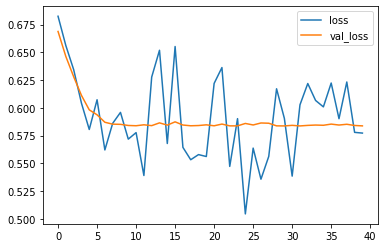

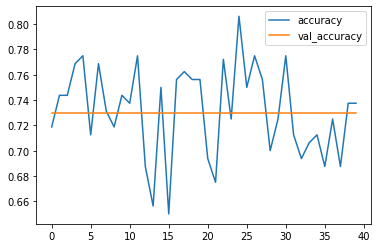

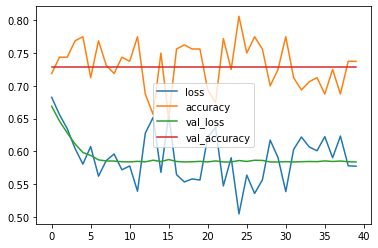

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()
losses.plot()